In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Need to reshape the input data for the convolutional network.

In [4]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

Similar to the network structure from the Computer Vision Intro notebook. The main difference is that this one has convolutional layers and pooling layers to enhance the features before it flattens the data and does the training in the Dense layers. The convolutional layers are essentially preprocessing the data to enhance the features, but it needs to learn what filters to apply to best enhance the features. So really the model is learning two things:
1. What filters result in the best feature enhancement (i.e. allow the model to best identify what's in the image)
2. What weights need to be set in the model to correctly classify the images

In [5]:
model = keras.Sequential([
    # generate 64 filters (each one 3x3) and multiply each one accross the image
    # each epoch, it figures out which filters gave the best signals to help match images to labels
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2, 2), # compress image and enhance features
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

Fit model to training data. Only doing 5 epochs so training doesn't take too long and because this is just practice.

In [7]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.5384 - accuracy: 0.8385
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3161 - accuracy: 0.8829
Epoch 3/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2833 - accuracy: 0.8936
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2576 - accuracy: 0.9033
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2361 - accuracy: 0.9103


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.3283 - accuracy: 0.8880


In [9]:
print(f'test acc: {test_acc}')
print(f'test loss: {test_loss}')

test acc: 0.8880000114440918
test loss: 0.32832416892051697


In [10]:
predictions = model.predict(test_images)

Show test images and predictions. Prediction is in green if it's correct and red if it's wrong. The percentage is the model's confidence that it made the correct prediction.

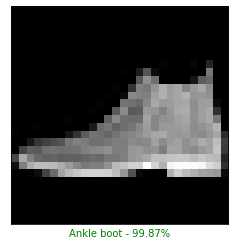

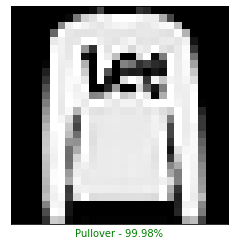

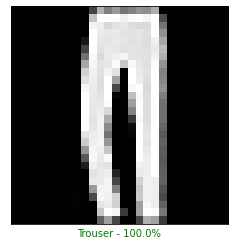

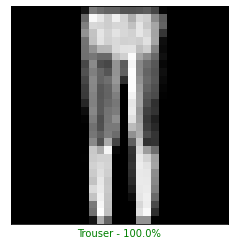

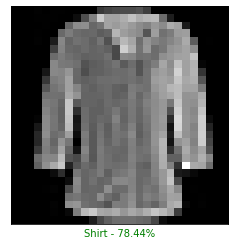

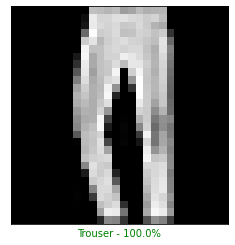

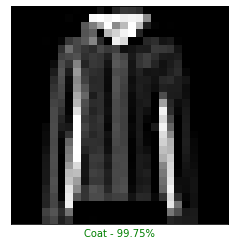

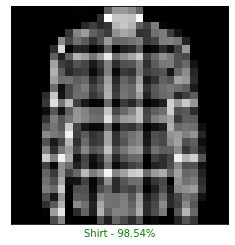

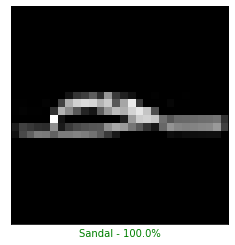

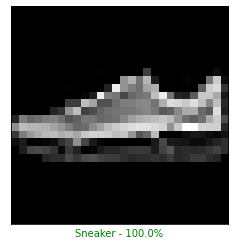

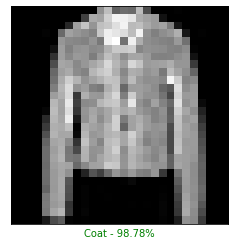

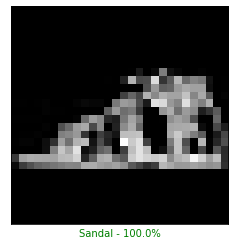

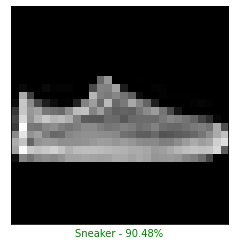

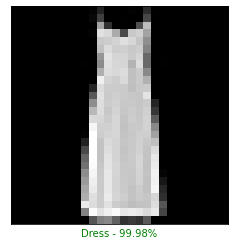

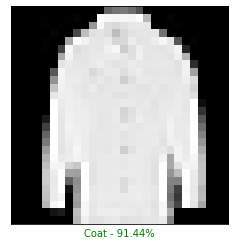

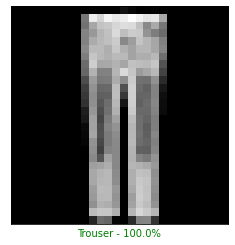

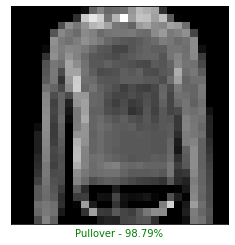

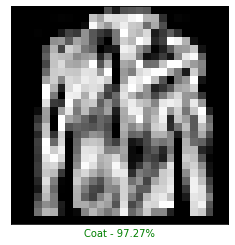

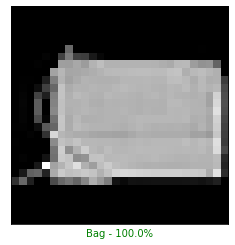

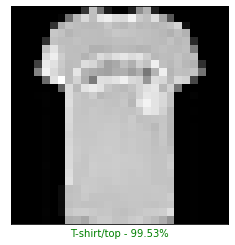

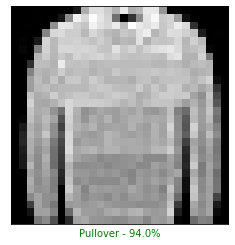

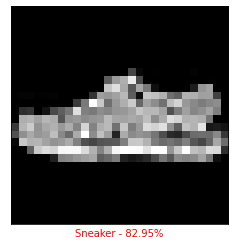

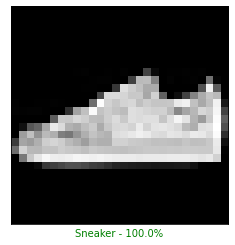

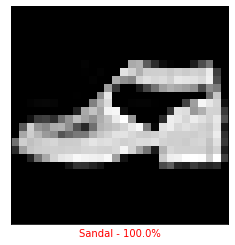

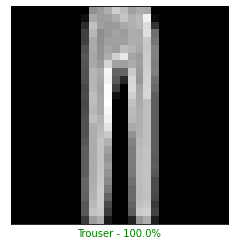

In [15]:
for i in range(25):
    plt.xticks([])
    plt.yticks([])
    pred_index = np.argmax(predictions[i])
    confidence = round(predictions[i][pred_index] * 100, 2)
    color = 'green' if pred_index == test_labels[i] else 'red'
    plt.xlabel(f'{class_names[pred_index]} - {confidence}%', color=color)
    plt.imshow(test_images[i], cmap='gray')
    plt.show()